# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию.

In [3]:
import pandas as pd
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

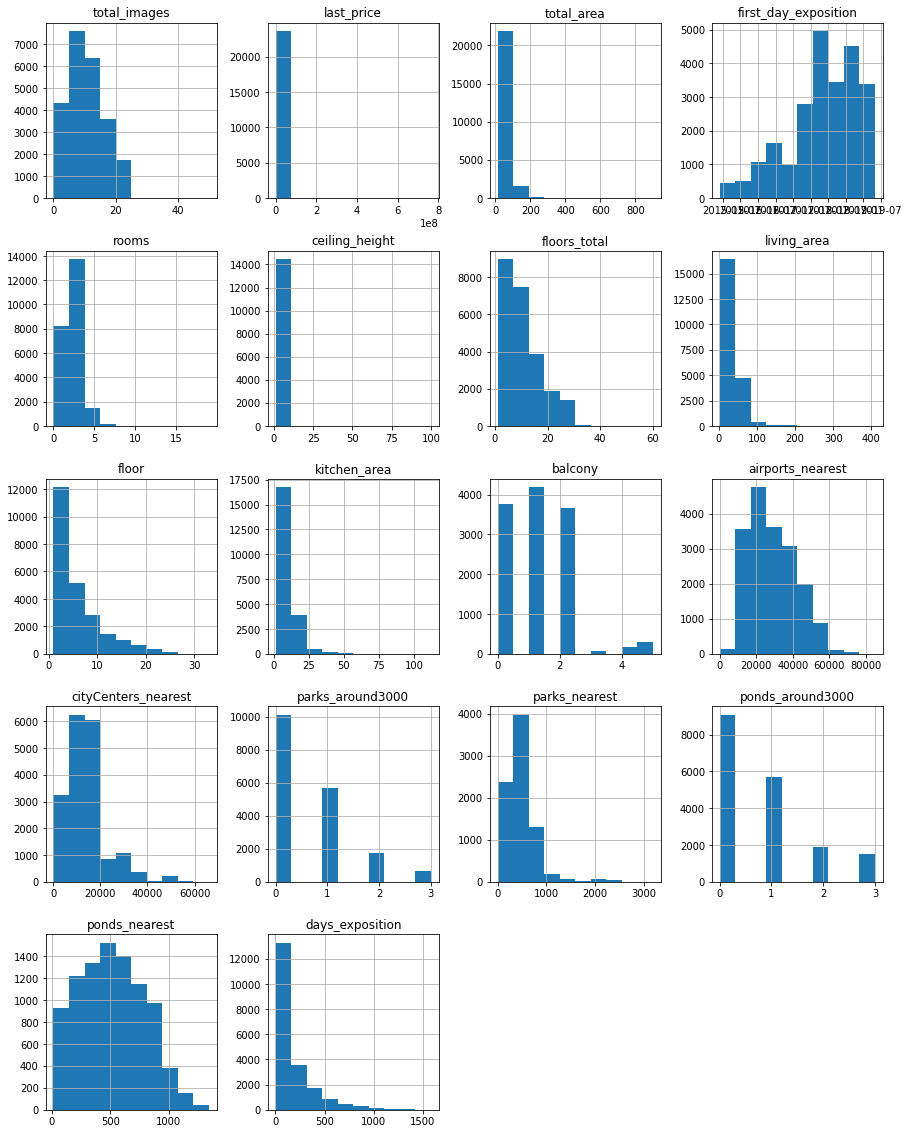

In [17]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])

data.info()

data.hist(figsize=(15, 20));

In [18]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


По первичному осмотру данных можно заметить немало пропусков, довольно большой разброс значений в некоторых столбцах, а так же явные ошибки в типе данных для некоторых столбцов, например 'balcony' - количество балконов имеет тип float.

### Предобработка данных

In [19]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Столбец "floors_total" нельзя заполнить на основе других данных. Столбец "living_area" и столбец "kitchen_area" можно постараться заполнить сгруппировав квартиры по площади. Столбец "balcony" можно заполнить 0, если владелец их не указал, значит, скорее всего, нет. Столбец 'ceiling_height' можно заполнить медианными значениями, так как основная часть данных в этом столбце находится в небольшом диапазоне.

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['balcony'] = data['balcony'].fillna(0)

Пропуски в столбце "is_apartment" можно заполнить False, так как если владелец не указал, что это аппартаменты, значит, это не они. 
Столбец "locality_name" нельзя заполнить на основе других данных.

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['locality_name'] = data['locality_name'].fillna("")

Пропуски в столбце "airports_nearest" можно было бы заполнить медианными значениями по населенным пунктам. До заполнения было 5542 пропусков, после заполнения 5386. Получается, остальные 5386 пропусков заполнить больше нельзя. Заполнить данные в kitchen_area на основе других нельзя. С столбцом "cityCenters_nearest" аналогично с "airports_nearest".

In [22]:
median_airports_nearest_table = data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest'] = data['airports_nearest'].fillna(median_airports_nearest_table)
#data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))






Заполнить пропуски в столбцах "parks_around3000" и "ponds_around3000" можно 0, так как если владелец не указал, значит их нет, а вот пропуски в столбцах "parks_nearest" и "ponds_nearest" на основве других данных не удастся. Пропуски "days_exposition" заполнить на основе других данных нельзя. 

In [23]:
my_iter = iter(data.index.values)
# Проверка если не указано количество парков, но указано расстояние до парка.
for i in range(len(data['parks_around3000'])):
    index = next(my_iter)
    if pd.isna(data.loc[index, 'parks_around3000']):
        if not pd.isna(data.loc[index, 'parks_nearest']):
            print(data.loc[index, 'parks_nearest'])

data['parks_around3000'] = data['parks_around3000'].fillna(0)   
    

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)    

In [24]:
print(data.isna().sum())

data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area               143
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name               0
airports_nearest         5386
cityCenters_nearest      5386
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  f

floors_total last_price balcony parks_around3000 ponds_around3000 days_exposition - все эти слобцы были приведены к целочисленному типу, так как содержат в себе количество этажей, цена, количество балконов, количество парков, количество прудов и количество дней соответственно и не могу содержать в себе не целые числа за исключением цены, однако все данные в данном столбце - целые числа, поэтому он тоже приведен к int.

In [25]:
data['floors_total'] = data['floors_total'].astype('Int64')
data['last_price'] = data['last_price'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
# data['days_exposition'] = data['days_exposition'].astype('Int64')
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23556 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23494 non-null  float64       
 13  balcony         

Чтобы избежать любых неявных дупликатов было решено удалить все префиксы и оставить только названия. Если потребуется иметь префкисы в дальнейшим, то их можно будет раздать заготовленными префиксами, чтобы не было дупликатов.

In [26]:
def getting_last_word(prefix_and_name):
    last_word = prefix_and_name.split(' ')
    if last_word[-1] == 'километр':
        return'Платформа 69-й километр'
    return last_word[-1]
    

data['locality_name'] = data['locality_name'].apply(getting_last_word)
tmp = data.query('locality_name == ""')
tmp

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.70,2016-04-15,3,3.55,5,50.80,2,False,...,8.80,0,,23478.0,4258.0,0,NaN,0,NaN,147
2033,6,5398000,80.00,2017-05-30,3,2.65,4,42.60,2,False,...,18.60,0,,22041.0,8943.0,0,NaN,0,NaN,34
2603,20,3351765,42.70,2015-09-20,1,2.65,24,15.60,3,False,...,10.70,0,,22041.0,17369.0,0,NaN,1,374.0,276
2632,2,5130593,62.40,2015-10-11,2,2.65,24,33.10,21,False,...,8.20,0,,22041.0,17369.0,0,NaN,1,374.0,256
3574,10,4200000,46.50,2016-05-28,2,2.65,5,30.80,5,False,...,6.50,0,,27419.0,8127.0,0,NaN,1,603.0,45
4151,17,17600000,89.50,2014-12-09,2,3.00,8,39.62,7,False,...,13.38,0,,25054.0,3902.0,1,485.0,3,722.0,869
4189,7,9200000,80.00,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,,21774.0,3039.0,1,690.0,1,953.0,223
4670,1,5500000,83.00,2015-08-14,3,2.65,7,52.00,6,False,...,11.00,0,,26534.0,5382.0,1,446.0,1,376.0,350
5343,19,13540000,85.50,2016-01-20,3,2.65,7,59.10,5,False,...,8.30,4,,10556.0,9538.0,1,67.0,0,NaN,303
5707,7,3700000,30.00,2016-04-29,1,2.65,24,20.00,23,False,...,6.00,0,,21460.0,16788.0,0,NaN,1,170.0,49


Можно заметить высоты потолка такие как 25, 26 и тд. Скорее всего владелец, который вписывал данные, мог ошибиться на один знак,из-за чего и получились такие огромные потолки. Также присуствуют потолки высотой типа 1, 1.2 или 8. В данном случае их лучше заменить на пропуски, так как ошибиться в знаке здесь не получиться, а потолков высотой 1 метр или 8 не существует или их практически единицы.

In [27]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 18, np.round(data['ceiling_height']/10, 1))
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height'] > 1.8) & (data['ceiling_height'] < 6), np.nan)

Был проверен каждый столец на уникальные значения. Где требовалось, были исправлены границы и выбивающиеся значения.

Встречались квартиры, которые стоят почти 1 млрд рублей, соотвественно их пришлось убрать. Также встречались данные на подобие 0 метров до ближайшего аиропорта, что тоже не является правдой и была допущена ошибка при создании обьявалении на продажу. Также встречались кухни, площадь которых 1 или 2 метра, что опять же является некоректными и невозможными данными. Попадались квартиры, в которых 19 комнат и площадью 900 кв метров, то бишь почти киллометр, их также пришлось обработать.

In [28]:
data['last_price'] = data['last_price'].where((1000000 < data['last_price']) & (data['last_price'] < 200000000), np.nan)
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'] > 3.5, np.nan)
data['airports_nearest'] = data['airports_nearest'].where(data['airports_nearest'] > 0, np.nan)
data['parks_nearest'] = data['parks_nearest'].where(data['parks_nearest'] > 10, np.nan)

data['rooms'] = data['rooms'].where(data['rooms'] < 15, np.nan)

data['rooms'] = data['rooms'].where(data['rooms'] > 0, np.nan)

data['total_area'] = data['total_area'].where(data['total_area'] < 300, np.nan)

data['rooms'] = data['rooms'].astype('Int64')
# display(data['rooms'].sort_values().unique())
# print(data['total_area'].sort_values().unique())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23445 non-null  Int64         
 2   total_area            23636 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23499 non-null  Int64         
 5   ceiling_height        23688 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23556 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23462 non-null  float64       
 13  balcony         

### Посчитаем и добавим в таблицу новые столбцы

In [29]:
data['price_per_1_sq_meter'] = data['last_price'] / data['total_area']
# Если потребуется, можно применить apply и раздать цифрам 0-6 названия дней недели
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def first_and_last_floor(row):
    if not pd.isnull(row['floors_total']) and row['floor'] == row['floors_total']:
        return 'Последний'
    if row['floor'] == 1:
        return 'Первый'
    return 'Другой'
data['first_last_etc_floor'] = data.apply(first_and_last_floor, axis=1)


data['distance_to_center_in_km'] = round(data['cityCenters_nearest'] / 1000)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1_sq_meter,day_of_the_week,month,year,first_last_etc_floor,distance_to_center_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,<NA>,120370.37037,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.0,1,6,2018,Другой,8.0


### Проведем исследовательский анализ данных

Можно заметить, что больше всего квартир имеет общую площадь в диапазоне 12-100 кв метров, пик общей площади квартиры в районе 45 метров.

<AxesSubplot:ylabel='Frequency'>

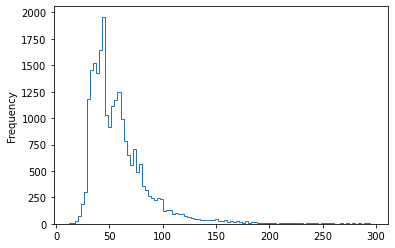

In [30]:
data['total_area'].plot(kind='hist', y='total_area', histtype="step", bins=100)

Есть несколько пиков жилой площади: 18 метров, 30 метров, 45 метров.

<AxesSubplot:ylabel='Frequency'>

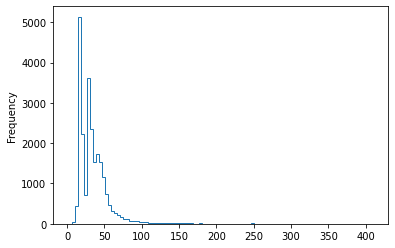

In [31]:
data['living_area'].plot(kind='hist', y='living_area', histtype="step", bins=100)

Есть микроскачок на отметке 0 метров, это присущно студиям, а пик находиться в районе 10 метров.

<AxesSubplot:ylabel='Frequency'>

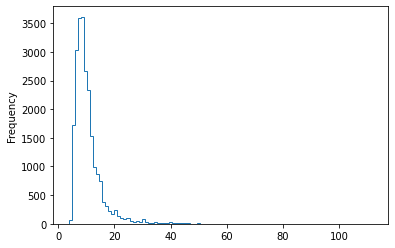

In [32]:
data['kitchen_area'].plot(kind='hist', y='kitchen_area', histtype="step", bins=100)

Переведем рубли в миллионы для наглядности. Увидим, что пик цены на продажу находиться в районе 5 млн рублей.

<AxesSubplot:ylabel='Frequency'>

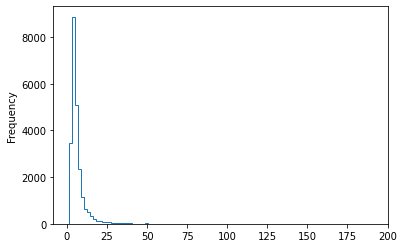

In [33]:
data['last_price_in_mln'] = data['last_price'] / 1000000
data['last_price_in_mln'].plot(kind='hist', y='last_price_in_mln', histtype="step", bins=100)

Можно заметить, что больше всего однокомнатных квартир, следом двухкомнатных и так далее. Чем больше комнат в кваритире, тем меньше таких квартир.

<AxesSubplot:ylabel='Frequency'>

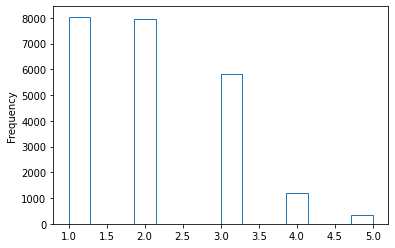

In [34]:
data['rooms'].plot(kind='hist', y='rooms', histtype="step", bins=data['rooms'].max(), range=(1, 5))


Можно заметить, что больше всего квартир на продажу располагается на 3 этаже. А дальше, чем этаж выше, тем меньше таких квартир.

<AxesSubplot:ylabel='Frequency'>

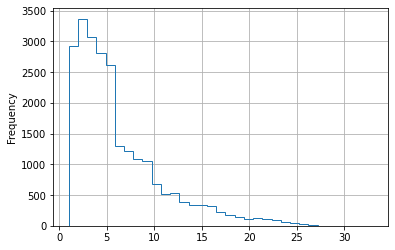

In [35]:
data['floor'].plot(kind='hist', y='floor', histtype="step", bins=33, grid=True)


Больше всего квартир располагаются не на первом и не на последнем этажах. Но это и так понятно, ведь в домах первый и последний - всего 2 этажа из всех.

<AxesSubplot:>

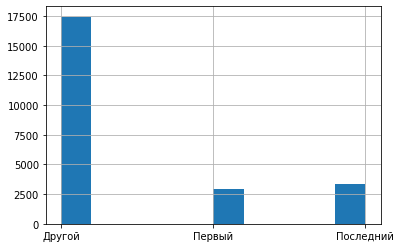

In [36]:
data['first_last_etc_floor'].hist()

Можно заметить, что больше всего выставлено обьявлений в 5-ти этажках или 9 этажках, что соотвествует действительности и очень правдиво.

<AxesSubplot:ylabel='Frequency'>

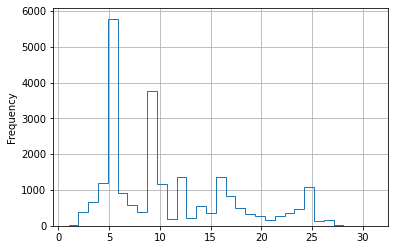

In [37]:
data['floors_total'].plot(kind='hist', y='floors_total', histtype="step", bins=31, grid=True, range=(1, 31))


Больше всего квартир распалагается в районе 15км от центра. Если дальше 15км от центра, тем меньше таких квартир.

<AxesSubplot:>

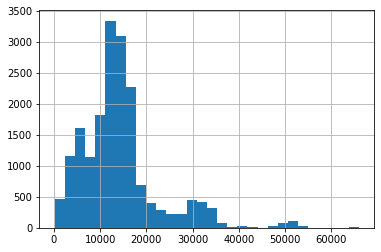

In [38]:
data['cityCenters_nearest'].hist(bins=30)

Больше всего квартир находиться в районе 20км от ближайшего аэропорта. Однако пиков много, например у 25км или 35км. Так как данные взяты из огромного числа деревень, сел и городов, все они могут хаотично распологаться вокруг аэропорта, от чего так много пиков.

<AxesSubplot:>

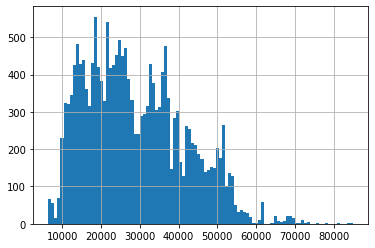

In [39]:
data['airports_nearest'].hist(bins=100)

Больше всего квартир находитсья в районе 500м от ближайшего парка, что можно с радостью сказать в шаговой доступности.

<AxesSubplot:>

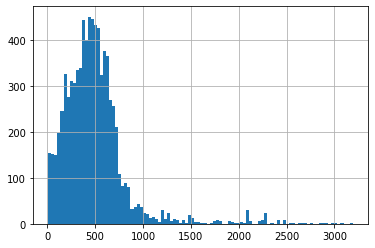

In [40]:
data['parks_nearest'].hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

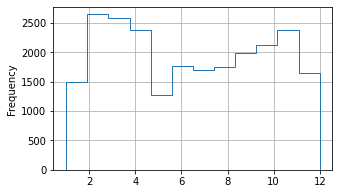

In [41]:
data['month'].plot(kind='hist', y='month', histtype="step", bins=12, grid=True, figsize = (5,3))



Чаще всего квартиры выставлялись в марте 13 числа. В целом пиков по дням много и вряд ли зависят от каких-либо внешних данных нашего датафрейма. 

<AxesSubplot:ylabel='Frequency'>

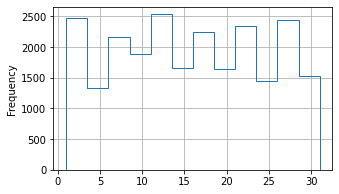

In [42]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['day'].plot(kind='hist', y='day', histtype="step", bins=12, grid=True, figsize = (5,3))

Не трудно заметить, что есть один огромный пик по высоте потолков - в районе 2,75 метров. Чем больше высота потолков, тем меньше таких квартир.

<AxesSubplot:ylabel='Frequency'>

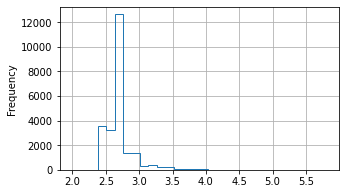

In [43]:
data['ceiling_height'].plot(kind='hist', y='ceiling_height', histtype="step", bins=30, grid=True, figsize = (5,3))

Среднее и медиана отличаются почти в два раза. Это происходит по тому, что существуеют продажи, которые произошли как за 1 день, так и за 1580 дней. Необычно долгими будем считать продажи, которые длились больше года, а необычно быстрыми - меньше двух недель.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

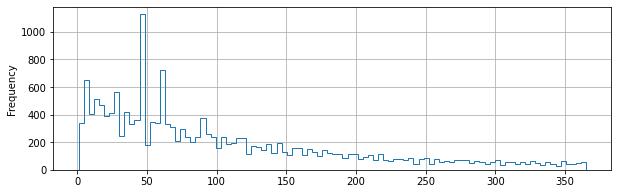

In [44]:
data['days_exposition'].plot(kind='hist', y='days_exposition', histtype="step", bins=100, grid=True, figsize = (10,3), range=(1, 365))



data['days_exposition'].describe()

На графике хорошо видна тендеция, что при увеличении площади растет и стоимость квартиры.

<AxesSubplot:xlabel='total_area'>

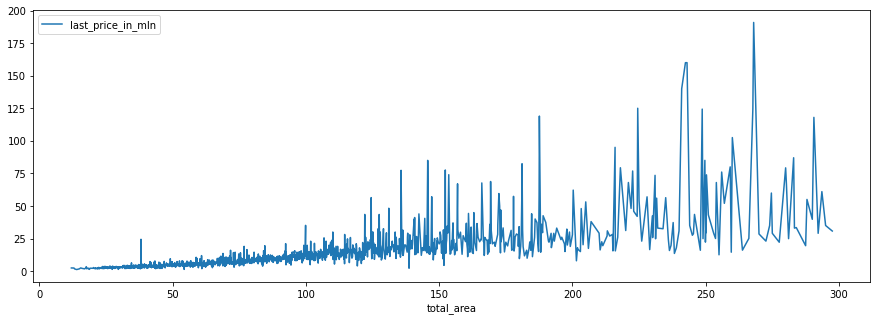

In [58]:
data.pivot_table(index='total_area', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))

<AxesSubplot:xlabel='total_area', ylabel='last_price_in_mln'>

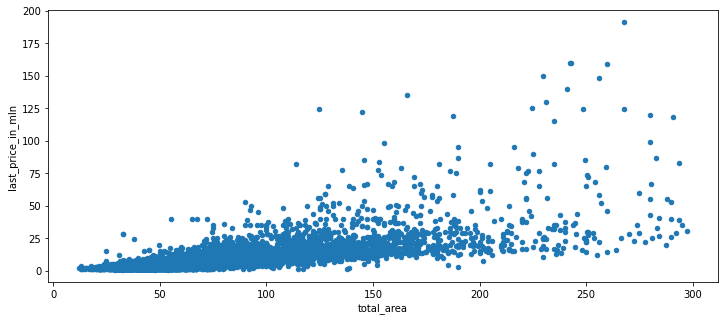

In [46]:
data.plot(x='total_area', y='last_price_in_mln', kind='scatter', figsize=(12, 5))


Также, как и с общей площадью: чем больше конкретно жилая площадь, тем выше и цена.

<AxesSubplot:xlabel='living_area'>

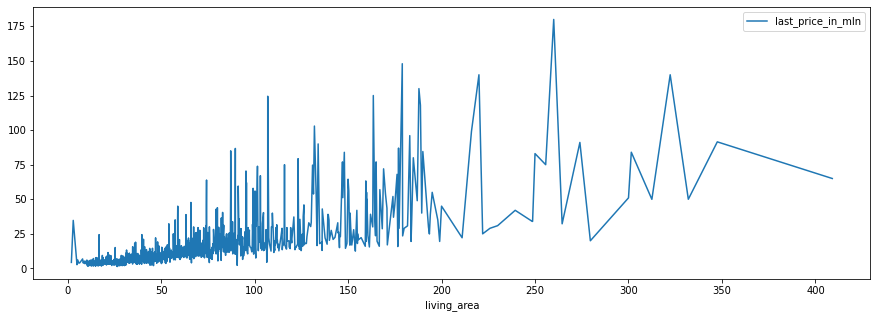

In [47]:
data.pivot_table(index='living_area', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))

Аналогично двум предыдущим параметрам.

<AxesSubplot:xlabel='kitchen_area'>

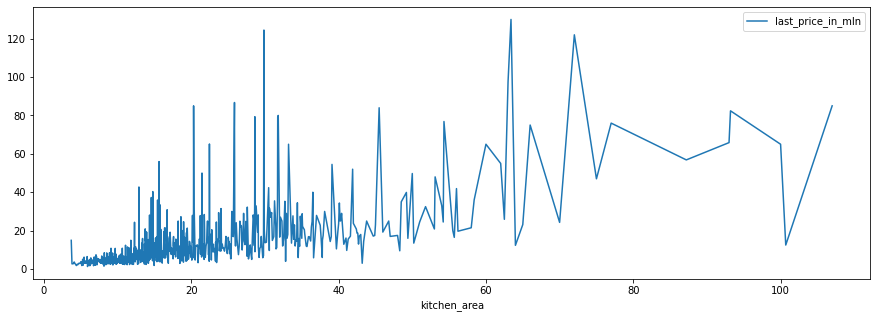

In [48]:
data.pivot_table(index='kitchen_area', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))

Опять же хорошо видна закономерность: чем больше комнат, тем выше и стоимость.

<AxesSubplot:xlabel='rooms'>

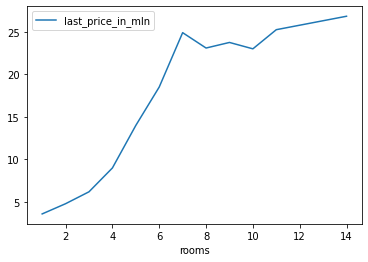

In [49]:
data.pivot_table(index='rooms', values='last_price_in_mln', aggfunc='median').plot()

На первом этаже самые дешевые квартиры, следом на последнем этаже. Обычно, люди предпочитают как раз-таки покупать квартиры не на 1 и не на последнем этаже, а что-то между, именно поэтому цена на квартиры между первым и последнем этажом выше.

<AxesSubplot:xlabel='first_last_etc_floor'>

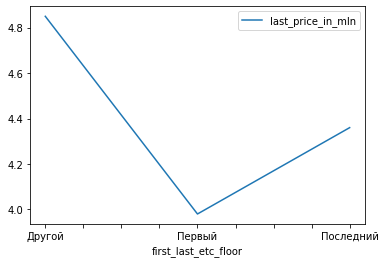

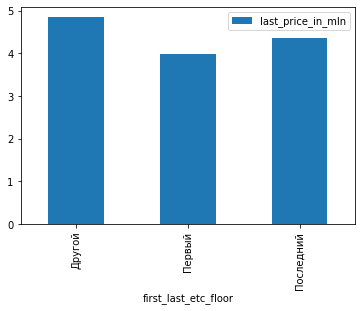

In [50]:
data.pivot_table(index='first_last_etc_floor', values='last_price_in_mln', aggfunc='median').plot()
data.pivot_table(index='first_last_etc_floor', values='last_price_in_mln', aggfunc='median').plot(kind='bar')

От даты размещения цена никак не зависит. Бывают единичные выбросы, но они происходят потому, что выставляют слишком дорогие квартиры, а в тенденции никакого роста нет.

Можно заметить, что чем ближе к выходным, тем меньше цена, но на самом деле, если посмотреть на диапазон, то он довольно низок, чтобы указывать на то, что это действительно зависит от дня недели.

<AxesSubplot:xlabel='day_of_the_week'>

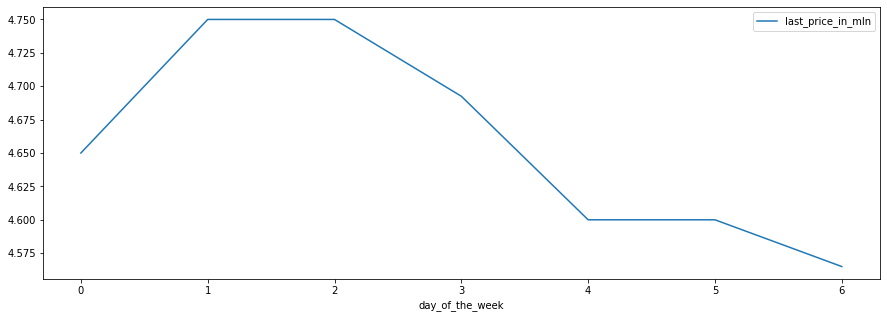

In [51]:
data.pivot_table(index='day_of_the_week', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))

Самые дешевые квартиры были выставлены в июня, однако опять же, посмотрев на диапазон цены, нельзя точно сказать, что это именно из-за месяца выставления.

<AxesSubplot:xlabel='month'>

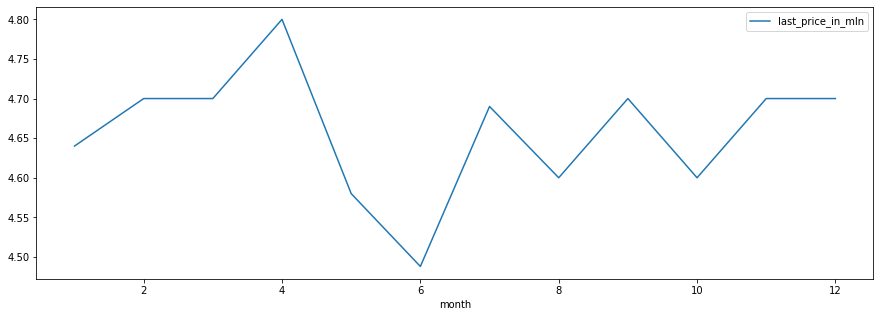

In [52]:
data.pivot_table(index='month', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))


А вот тут уже можно точно сказать, что цены на кваритиры в 2014 году были на порядок выше, чем во всех последующих годах.

<AxesSubplot:xlabel='year'>

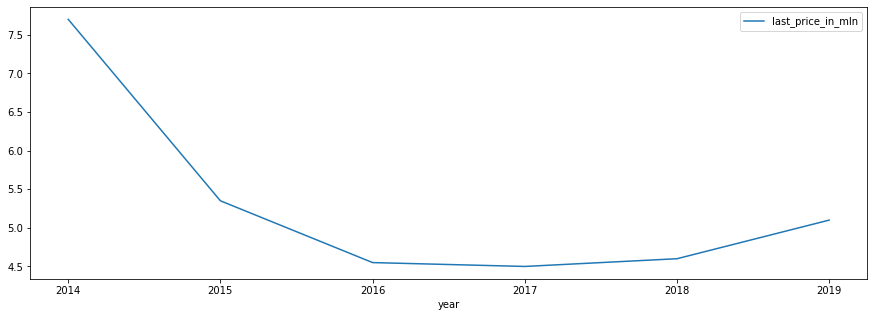

In [53]:
data.pivot_table(index='year', values='last_price_in_mln', aggfunc='median').plot(figsize=(15, 5))


In [54]:
print(data[['last_price', 'total_area', 'living_area', 'rooms']].corr())

             last_price  total_area  living_area     rooms
last_price     1.000000    0.715991     0.662486  0.435592
total_area     0.715991    1.000000     0.936950  0.784220
living_area    0.662486    0.936950     1.000000  0.841679
rooms          0.435592    0.784220     0.841679  1.000000


In [55]:
#код ревьюера
data['last_price'].astype('float64').corr(data['total_area'].astype('float64'))

0.7159912864727559

In [56]:
df = data.pivot_table(index='locality_name', values='price_per_1_sq_meter', aggfunc=['count','mean'])
df.columns = ['count', 'mean_of_price_per_1_sq_meter']
df = df.sort_values(by='count', ascending=False)
display(df.head(10))
df = df.head(10)



maxx = df['mean_of_price_per_1_sq_meter'].max()
minn = df['mean_of_price_per_1_sq_meter'].min()
display(df.query('mean_of_price_per_1_sq_meter == @maxx'))
display(df.query('mean_of_price_per_1_sq_meter == @minn'))



,count,mean_of_price_per_1_sq_meter
locality_name,,
Санкт-Петербург,15711,114136.518737
Мурино,590,86087.51205
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,397,68719.287383
Пушкин,369,103130.851744
Колпино,338,75333.295801
Парголово,327,90175.913458
Гатчина,306,68935.194838


,count,mean_of_price_per_1_sq_meter
locality_name,,
Санкт-Петербург,15711,114136.518737


,count,mean_of_price_per_1_sq_meter
locality_name,,
Выборг,233,58685.669032


Можно заметить, что резкий спад наблюдается при 3км от центра. Да и вообще - чем дальше от центра, тем дешевле, а в сравнении с 0-3 км разница будет колосальной. Можно предположить, что центр города заканчивается на 3км.

                               last_price
distance_to_center_in_km                 
0.0                       31449115.851852
1.0                       18170799.994737
2.0                       16547181.488673
6.0                       14966195.401945
7.0                       14775152.585714
5.0                       13706860.824427
4.0                       12213019.382824
3.0                       11126581.002857
8.0                        9269726.417785
27.0                            8300000.0
9.0                        6962378.964527
10.0                       6504119.232267
11.0                       6250814.964346
12.0                       6189738.801921
13.0                        6083140.86685
20.0                       5951464.836735
15.0                       5884751.392219
14.0                       5629101.249414
21.0                       5493469.367521
22.0                       5415524.282178
16.0                       5373130.559684
17.0                       5292394

<AxesSubplot:xlabel='distance_to_center_in_km'>

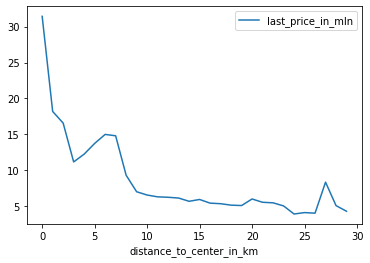

In [57]:
my_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_center_in_km', values='last_price')
print(my_data.sort_values(by='last_price', ascending=False))
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_center_in_km', values='last_price_in_mln').plot()

### Общий вывод

Проведен анализ данных по обьявлениям по продаже квартир. В данных было немало пропусков, которые получилось заполнить лишь отчасти опираясь на логическое мышление для заполнения пропусков, например в столбце 'balcony', или оперируя другими данными для заполнения, например 'airport_nearest', для него приходилось группировать данные и находить медианное значение по 'locality_name' для заполнения пропусков, однако заполнить подобные столбцы полностью практически не вышло. Были выявлены ошибки в типах столбцов, в ручную изменены типы столбцов на более правильные и более подходящие. Было найдено много важных и интересных зависимостей, например: Самые дешевый квартиры находяться на первом этаже, а больше всего обьявлений выставлено из 5-ти и 9-ми этажных домов. Радует факт того, что большинство квартир находятся в 500 метра до ближайшего парка. Важным выводом будет факт того, что имеется тенденция роста цены квартиры в зависимости от ее площади, количества комнат, насколько близко квартира к центру. Большинство квартир, выставленных на продажу, именно из самого Санкт-Петербурга. Самые дорогие квартиры были в 2014 году, а затем пошел резкий спад. Также цена становиться намного ниже, если квартира отдалена более чем на 3км от центра.